# The Structure

* Find the package
* Importing Libraries
* Detects the tempo & Beat Position
* Visualization
* Other Musical aspects to analyse
    * Onsets Detection
    * Predominant Local Pulse (PLP)
    
    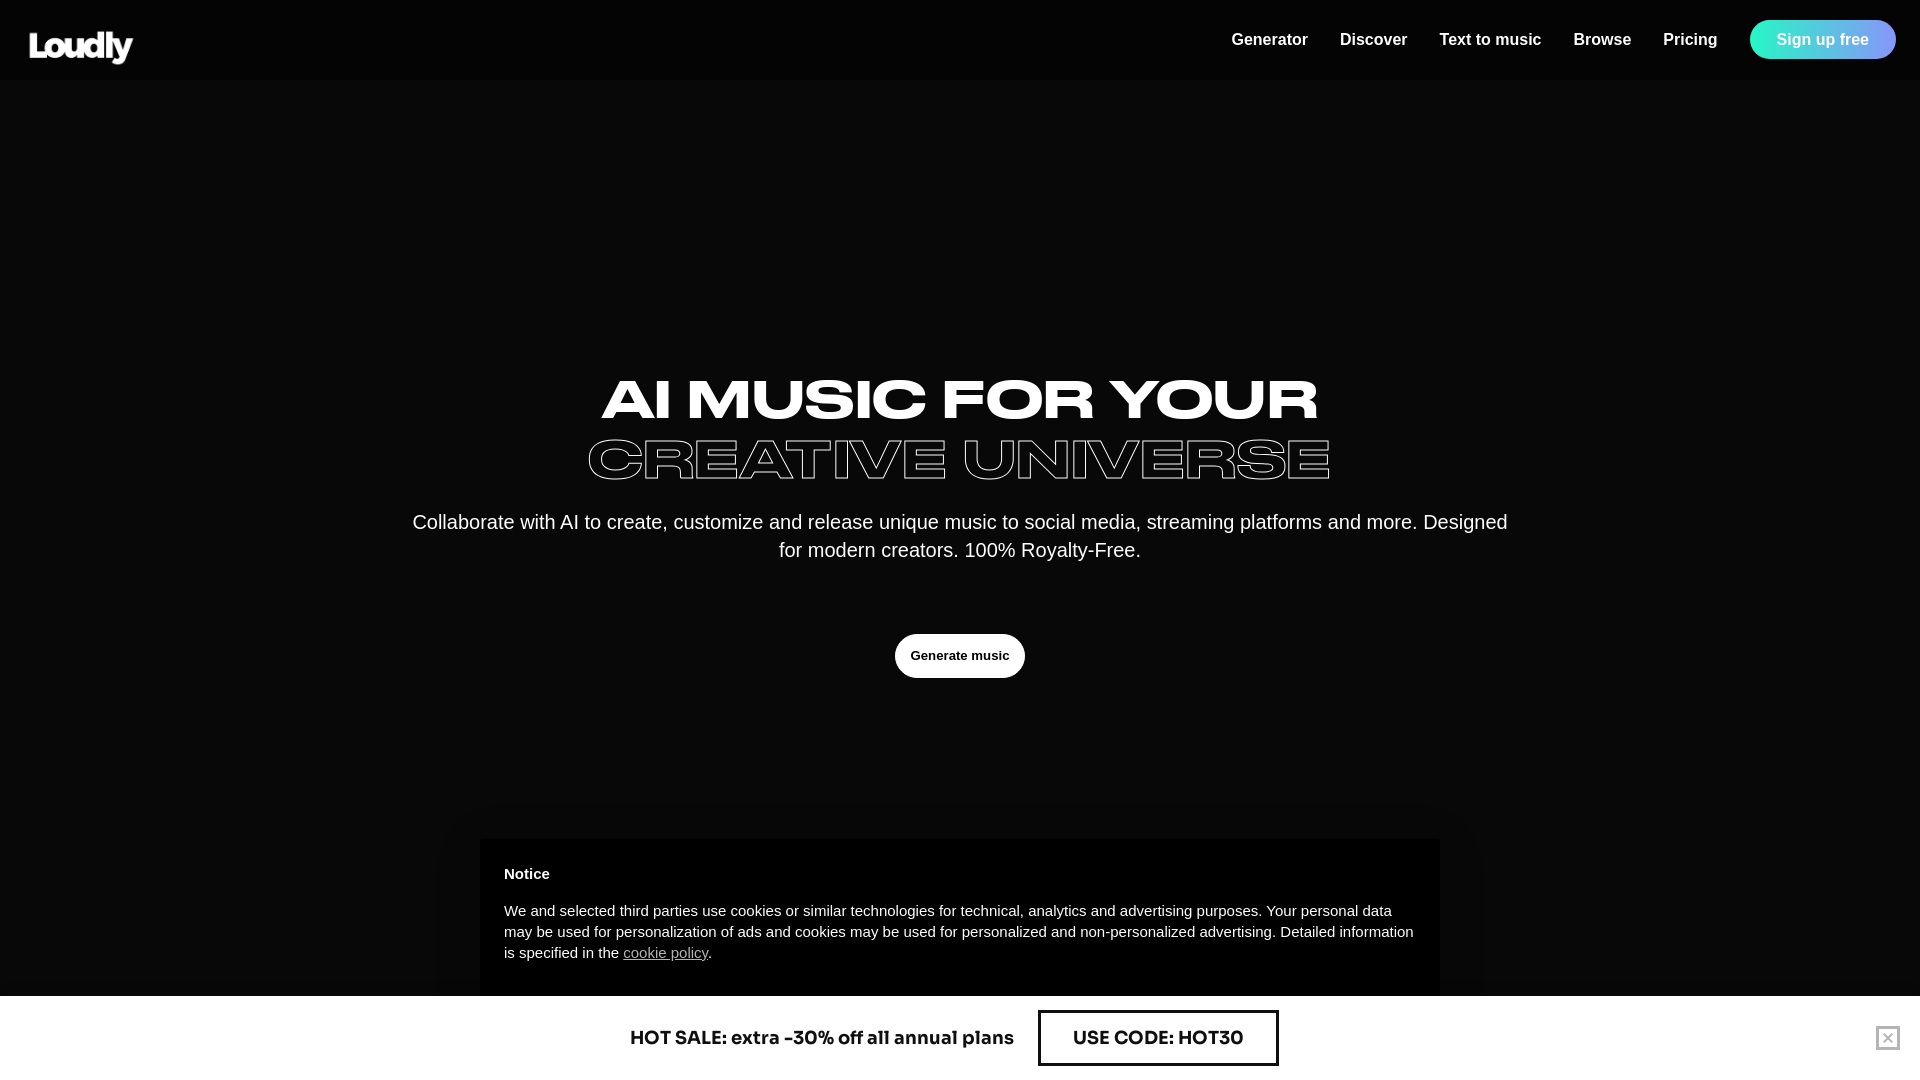

# Find The Package


> To perform a Beat tracking we need to find the suitable package that can perform the task which is
[Librosa](https://librosa.org/doc/main/generated/librosa.beat.beat_track.html
)

- First i need to install the package into the working environment

In [1]:
pip install librosa matplotlib numpy



---



# Importing Libraries

First i need to import the needed library which are:

- `librosa`:Library for audio analysis and processing.
-  `matplotlib.pyplot` For plotting purposes
- `numpy` To handel an error that i got with tempo values


In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np



---



# Detects the tempo & Beat Position

> Then i Load the audio file with `librosa.load`

> Detects the tempo & beat positions with `librosa.beat.beat_track`

> Here i got an issue with `tempo` because its a NumPy array rather than a single float value.

So i Added a check to see if tempo is a NumPy array using `isinstance(tempo, np.ndarray)` and it worked.

> Then i Converted Beat Frames to Time and print the results


In [2]:
audio_path = '/content/loudly.mp3'
y, sr = librosa.load(audio_path)

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

if isinstance(tempo, np.ndarray):
    tempo = tempo[0]

beat_times = librosa.frames_to_time(beat_frames, sr=sr)

print(f"Estimated tempo: {tempo:.2f} BPM")
print(f"Beat positions (in seconds): {beat_times}")

Estimated tempo: 89.10 BPM
Beat positions (in seconds): [ 3.36689342  4.04027211  4.69043084  5.38702948  6.03718821  6.71056689
  7.36072562  8.03410431  8.70748299  9.38086168 10.03102041 10.70439909
 11.37777778 12.02793651 12.70131519 13.37469388 14.02485261 14.69823129
 15.37160998 16.04498866 16.69514739 17.36852608 18.04190476 18.71528345
 19.36544218 20.03882086 20.68897959 21.38557823 22.03573696]


- As i can see the estimated tempo for this music audio is 89.10 BPM

- There's 28 beat Positions



---



# Visualization

- The Visualization of the audio waveform and the beat positions will include:

    - Create the Figure and Axes
    - Plot the Audio Waveform
    - Plot the Beat Positions
    - Scatter Plot for Beat Markers
    - Remove Unnecessary Plot Borders
    - Customize Title and Axis Labels
    - Improve Grid Visibility
    - Add a Legend

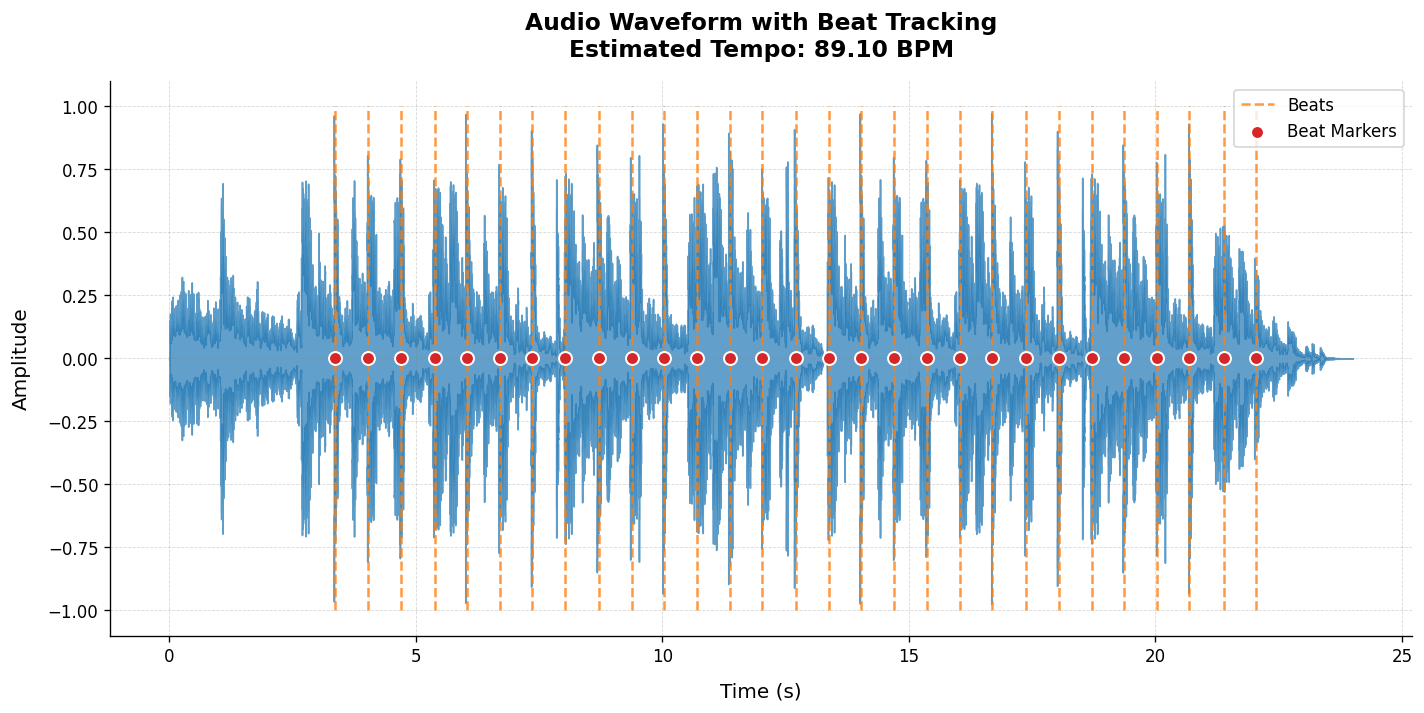

In [5]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=120)

librosa.display.waveshow(y, sr=sr, alpha=0.7, color="#1f77b4", ax=ax)

ax.vlines(beat_times, ymin=-1, ymax=1, color="#ff7f0e", linestyle="--", linewidth=1.5, alpha=0.8, label="Beats")
ax.scatter(beat_times, np.zeros_like(beat_times), color="#d62728", marker="o", s=60, edgecolors="white", linewidth=1.2, label="Beat Markers", zorder=3)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_title(f"Audio Waveform with Beat Tracking\nEstimated Tempo: {tempo:.2f} BPM", fontsize=14, fontweight="bold", pad=15)
ax.set_xlabel("Time", fontsize=12, labelpad=10)
ax.set_ylabel("Amplitude", fontsize=12, labelpad=10)

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.3, color="gray")
ax.legend(fontsize=10, loc="upper right")
plt.show()

> I can see that The beats is  evenly spaced meaning that the song  maintains a steady tempo throughout all the song

> The waveform shows variations in amplitude meaning that there's dynamic changes in loudness



---



# Other Musical aspects to analyse

After checking some resources mainly [YouTube:Tempo and Beat Tracking
](https://www.youtube.com/watch?v=FmwpkdcAXl0&ab_channel=AudioLabsErlangen)  

an aspects that could be helpful to visualize and analyse are Onsets and PLP


# Onsets Detection

> Automatic detection of musical events in an audio signal is one of the most fundamental tasks in music information retrieval. Here, i will show how to detect an onset, the very instant that marks the beginning of the transient part of a sound, or the earliest moment at which a transient can be reliably detected. [(music information retrieval)](https://musicinformationretrieval.com/onset_detection.html)

- The Visualization steps are similar to the previews one


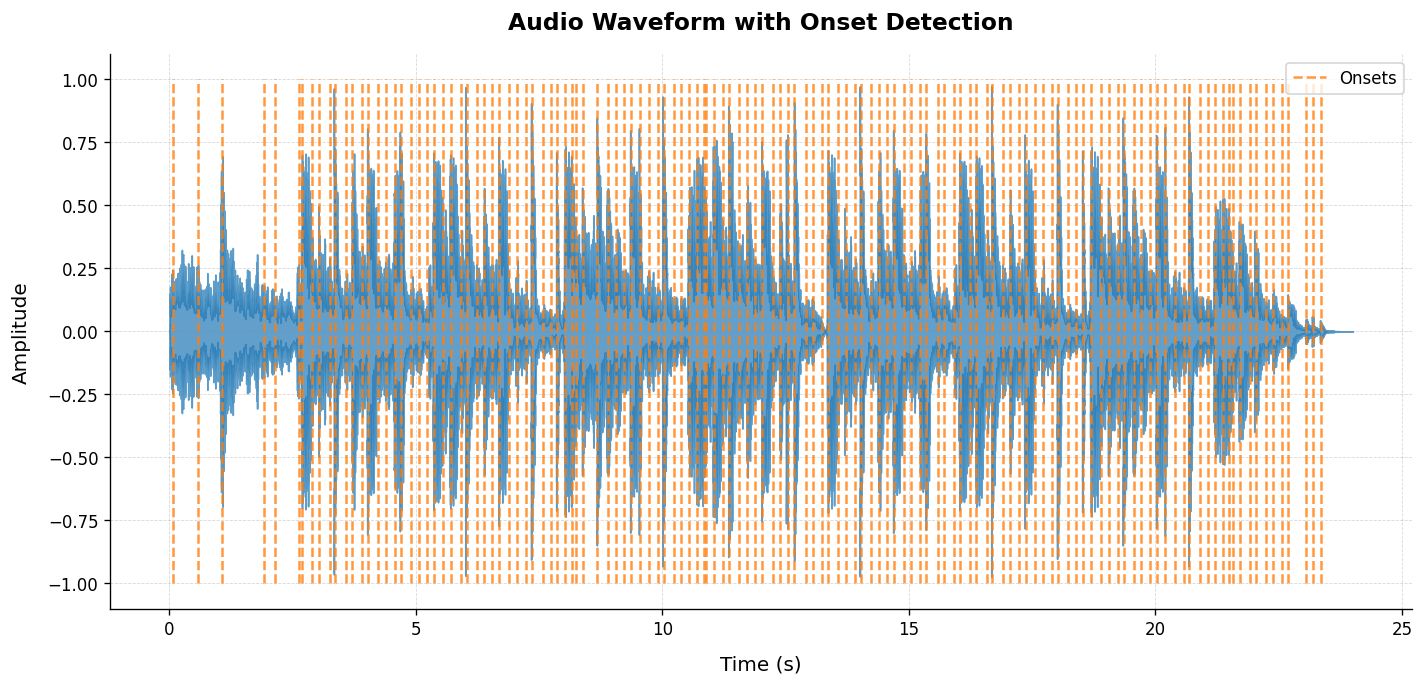

In [21]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

fig, ax = plt.subplots(figsize=(14, 6), dpi=120)

librosa.display.waveshow(y, sr=sr, alpha=0.7, color="#1f77b4", ax=ax)
ax.vlines(onset_times, ymin=-1, ymax=1, color="#ff7f0e", linestyle="--", linewidth=1.5, alpha=0.8, label="Onsets")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_title("Audio Waveform with Onset Detection", fontsize=14, fontweight="bold", pad=15)
ax.set_xlabel("Time (s)", fontsize=12, labelpad=10)
ax.set_ylabel("Amplitude", fontsize=12, labelpad=10)

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.3, color="gray")
ax.legend(fontsize=10, loc="upper right")
plt.show()


From the results i can conclude that
- The onsets are evenly spaced which suggests a regular rhythmic structure
- The onsets density is high which means a high texture of the music



---



# Predominant Local Pulse (PLP)


The Predominant Local Pulse (PLP) is a rhythmic analysis tool that estimates the underlying beat of a piece of music. It’s useful for identifying the dominant rhythm and tempo, even in complex or polyrhythmic music. [(Librosa)](https://librosa.org/doc/main/generated/librosa.beat.plp.html)

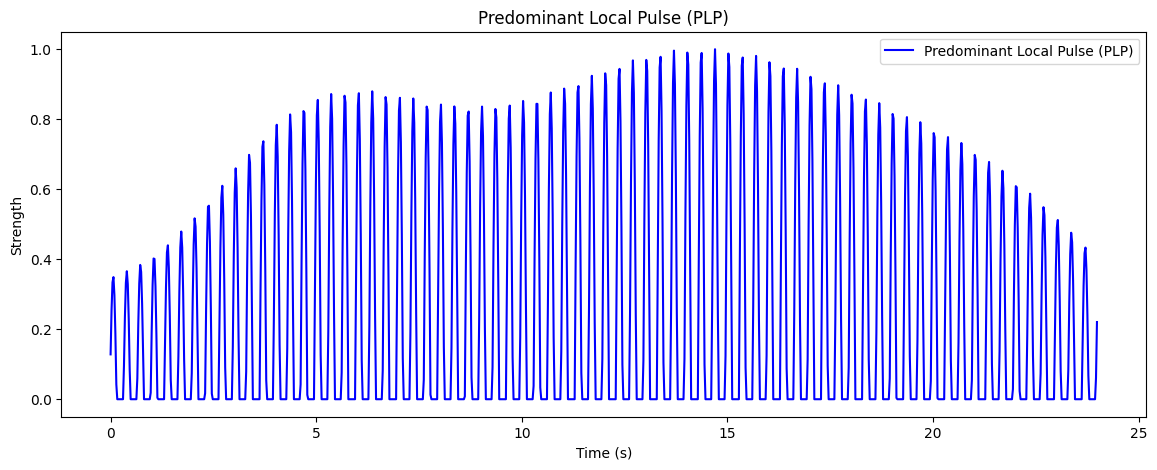

In [19]:
# Compute PLP
plp = librosa.beat.plp(y=y, sr=sr)

plt.figure(figsize=(14, 5))
times = librosa.times_like(plp, sr=sr)
plt.plot(times, plp, label='Predominant Local Pulse (PLP)', color='b')
plt.title('Predominant Local Pulse (PLP)')
plt.xlabel('Time (s)')
plt.ylabel('Strength')
plt.legend()
plt.show()

> Variations in the PLP curve indicate tempo changes and shifts in the musical structure

# **THANK YOU FOR YOUR READING TIME**